<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Twitter Sentiment Analysis System</b></div>

<div style="width:100%;text-align:center"> 
<img align=middle src = "https://ichef.bbci.co.uk/news/976/cpsprodpb/13B2F/production/_127678608_gettyimages-1244636244.jpg" width="500px">
</div>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Sentiment Analysis System using Bag of Words and TFIDF Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        positive         
        neutral             
        negative          
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [1]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Read The Dataset</b></div>

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

In [2]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
# Read the Data in CSV Format
train_dataset = pd.read_csv('twitter_training.csv', names=['Id', 'Entity', 'Sentiment', 'Tweet'])
train_dataset = pd.DataFrame(train_dataset)
#Load the Training Data
print("Training Data:")
print("=============\n")
train_dataset.sample(5)

Training Data:



Id           Entity   Sentiment  \
4902      43           Amazon     Neutral   
38502   5404      Hearthstone    Positive   
35951   8171        Microsoft     Neutral   
30722   7278  LeagueOfLegends     Neutral   
11224  13130    Xbox(Xseries)  Irrelevant   

                                                   Tweet  
4902                    Amazon is already altering the    
38502  The Angry Chicken is back! Talking all the  . ...  
35951  Performance Synopsys, TSMC 2 Microsoft Azure D...  
30722                                                ...  
11224  The thing is is that MS Mac doesn't give a dam...

In [3]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
val_dataset = pd.read_csv('twitter_validation.csv', names=['Id', 'Entity', 'Sentiment', 'Tweet'])
val_dataset = pd.DataFrame(val_dataset)
#Load the Training Data
print("Validation Data:")
print("=============\n")
val_dataset.sample(5)

Validation Data:



Id               Entity   Sentiment  \
289  4880  GrandTheftAuto(GTA)    Positive   
306  3634        Cyberpunk2077    Positive   
504    49               Amazon     Neutral   
788   604          ApexLegends    Positive   
663  3316             Facebook  Irrelevant   

                                                 Tweet  
289  Love GTA San Andreas and red death redemption,...  
306  "A delayed game is eventually good, but a rush...  
504  I played this interesting quiz on Amazon - Try...  
788  @PlayApex  @Respawn  Hey Respawn,just now play...  
663  This fat juicy son of a crackhead BITCH! My go...

In [4]:
dataset = pd.concat([train_dataset, val_dataset], ignore_index=True)

In [5]:
dataset

Id               Entity   Sentiment  \
0      2401          Borderlands    Positive   
1      2401          Borderlands    Positive   
2      2401          Borderlands    Positive   
3      2401          Borderlands    Positive   
4      2401          Borderlands    Positive   
...     ...                  ...         ...   
75677  4891  GrandTheftAuto(GTA)  Irrelevant   
75678  4359                CS-GO  Irrelevant   
75679  2652          Borderlands    Positive   
75680  8069            Microsoft    Positive   
75681  6960      johnson&johnson     Neutral   

                                                   Tweet  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
75677  ⭐️ Toronto is the arts and culture capital of ...  
75678  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
75679  Today sucked so it’s time to drink wine n play...  
75680  Bought a fraction of Microsoft today. Small wins.  
75681  Johnson & Johnson to stop selling talc baby po...  

[75682 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding (Before Data Preprocessing)</b></div>

In [6]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (75682, 4)


In [7]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['Id', 'Entity', 'Sentiment', 'Tweet'], dtype='object')


In [8]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

Id            int64
Entity       object
Sentiment    object
Tweet        object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:15px ; color:#034914">

**Tweet**<br>
* In a quick review we can observe basic information <br>
* But we are going to create a function to show of more details such as<br>
Volume of null values and its percentage , Volume of duplicated and percentage of duplicated values

</div>

In [9]:
dataset.describe(include='all')

Id                Entity Sentiment  Tweet
count   75682.000000                 75682     75682  74996
unique           NaN                    32         4  69974
top              NaN  TomClancysRainbowSix  Negative       
freq             NaN                  2435     22808    172
mean     6432.579583                   NaN       NaN    NaN
std      3740.243463                   NaN       NaN    NaN
min         1.000000                   NaN       NaN    NaN
25%      3196.000000                   NaN       NaN    NaN
50%      6423.000000                   NaN       NaN    NaN
75%      9602.000000                   NaN       NaN    NaN
max     13200.000000                   NaN       NaN    NaN

In [10]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Tweet**<br>
* We can see that very small number of data are missed and duplicated which can easily be dropped.

</div>

In [11]:
show_details(dataset)

Id       Entity    Sentiment        Tweet
Missed_Values           0.000000     0.000000     0.000000   686.000000
Missed_Values %         0.000000     0.000000     0.000000     0.009064
Duplicated values    3217.000000  3217.000000  3217.000000  3217.000000
Duplicated values %     0.042507     0.042507     0.042507     0.042507

In [12]:
print('The Count of sentiments in the dataset : \n')
Sentiment =dataset.Sentiment.value_counts()
Sentiment.to_frame()

The Count of sentiments in the dataset : 



count
Sentiment        
Negative    22808
Positive    21109
Neutral     18603
Irrelevant  13162

In [13]:
print('The Count of Entities in the dataset : \n')
Entity =dataset.Entity.value_counts()
Entity.to_frame()

The Count of Entities in the dataset : 



count
Entity                                  
TomClancysRainbowSix                2435
LeagueOfLegends                     2431
MaddenNFL                           2429
Microsoft                           2428
CallOfDuty                          2425
Verizon                             2414
ApexLegends                         2412
Facebook                            2403
CallOfDutyBlackopsColdWar           2403
WorldOfCraft                        2394
Dota2                               2391
FIFA                                2378
NBA2K                               2373
Battlefield                         2372
TomClancysGhostRecon                2368
johnson&johnson                     2367
Overwatch                           2366
Xbox(Xseries)                       2360
Amazon                              2350
PlayStation5(PS5)                   2343
GrandTheftAuto(GTA)                 2339
CS-GO                               2336
Cyberpunk2077                       2334
Nvidia                              2333
Hearthstone                         2330
HomeDepot                           2328
Google                              2322
Borderlands                         2319
PlayerUnknownsBattlegrounds(PUBG)   2312
Fortnite                            2308
RedDeadRedemption(RDR)              2302
AssassinsCreed                      2277

In [14]:
print(f'The number of unique Entities : {len(dataset.Entity.unique())}')
print('**' * 40)
dataset.Entity.unique()

The number of unique Entities : 32
********************************************************************************


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Preprocessing</b></div>

##  Remove Irrelevant Sentiments

In [15]:
def remove_irrelevant(dataset):
    condition = (dataset["Sentiment"] == "Irrelevant")
    dataset = dataset[~condition]
    return dataset

dataset = remove_irrelevant(dataset)
dataset.head()

Id       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

## Remove Duplicate, Null, and Missing Values

In [16]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
show_details(dataset)

Id  Entity  Sentiment  Tweet
Missed_Values        0.0     0.0        0.0    0.0
Missed_Values %      0.0     0.0        0.0    0.0
Duplicated values    0.0     0.0        0.0    0.0
Duplicated values %  0.0     0.0        0.0    0.0

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


In [19]:
# Apply the Preprocessing on Input Data Comments of Training Data
dataset['Tweet'] = dataset['Tweet'].apply(data_preprocessing)

print("\nTraining Data After Pre-processing:")
print("====================================\n")
dataset.head(20)


Training Data After Pre-processing:



Id       Entity Sentiment  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   
5   2401  Borderlands  Positive   
6   2402  Borderlands  Positive   
7   2402  Borderlands  Positive   
8   2402  Borderlands  Positive   
9   2402  Borderlands  Positive   
10  2402  Borderlands  Positive   
11  2402  Borderlands  Positive   
12  2403  Borderlands   Neutral   
13  2403  Borderlands   Neutral   
14  2403  Borderlands   Neutral   
15  2403  Borderlands   Neutral   
16  2403  Borderlands   Neutral   
17  2403  Borderlands   Neutral   
18  2404  Borderlands  Positive   
19  2404  Borderlands  Positive   

                                                Tweet  
0                          getting borderlands murder  
1                                 coming borders kill  
2                            getting borderlands kill  
3                           coming borderlands murder  
4                          getting borderlands murder  
5                          getting borderlands murder  
6   spent hours making something fun dont know hug...  
7   spent couple hours something fun dont know hug...  
8   spent hours something fun dont know huge borde...  
9   spent hours making something fun dont know hug...  
10  spent hours making something fun dont know hug...  
11                                                     
12  rockhard varlope rare powerful handsome jackpo...  
13  rockhard varlope rare powerful handsome jackpo...  
14  rockhard varlope rare powerful handsome jackpo...  
15  rockhard vita rare powerful handsome jackpot b...  
16  live rock hard music varlope rare powerful liv...  
17  ihard like rare london handsome borderlands xb...  
18  first borderlands session long time actually r...  
19  first borderlands session long time actually r...

In [20]:
dataset

Id                  Entity Sentiment  \
0       2401             Borderlands  Positive   
1       2401             Borderlands  Positive   
2       2401             Borderlands  Positive   
3       2401             Borderlands  Positive   
4       2401             Borderlands  Positive   
...      ...                     ...       ...   
75666   1373             Battlefield  Negative   
75667  10588  RedDeadRedemption(RDR)   Neutral   
75670   7516         LeagueOfLegends   Neutral   
75671   5708               HomeDepot  Positive   
75673   2165              CallOfDuty   Neutral   

                                                   Tweet  
0                             getting borderlands murder  
1                                    coming borders kill  
2                               getting borderlands kill  
3                              coming borderlands murder  
4                             getting borderlands murder  
...                                                  ...  
75666  noticed streamers watch playing games battlefi...  
75667  playing red dead redemption shit bear starts r...  
75670  suikoden alex kidd miracle world persona soul ...  
75671  thank matching funds home depot payment genero...  
75673  late night stream boys come watch warzone runs...  

[59515 rows x 4 columns]

In [21]:
def filter_tweets_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'Tweet' column
    dataset['Num_Words'] = dataset['Tweet'].apply(lambda x: len(str(x).split()))
    
    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = dataset[dataset['Num_Words'] >= min_words].copy()
    
    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])
    
    return filtered_dataset

dataset = filter_tweets_by_word_count(dataset)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
dataset.head()

Dataset Data:



Id       Entity Sentiment                       Tweet
0  2401  Borderlands  Positive  getting borderlands murder
1  2401  Borderlands  Positive         coming borders kill
2  2401  Borderlands  Positive    getting borderlands kill
3  2401  Borderlands  Positive   coming borderlands murder
4  2401  Borderlands  Positive  getting borderlands murder

In [22]:
dataset

Id                  Entity Sentiment  \
0       2401             Borderlands  Positive   
1       2401             Borderlands  Positive   
2       2401             Borderlands  Positive   
3       2401             Borderlands  Positive   
4       2401             Borderlands  Positive   
...      ...                     ...       ...   
75666   1373             Battlefield  Negative   
75667  10588  RedDeadRedemption(RDR)   Neutral   
75670   7516         LeagueOfLegends   Neutral   
75671   5708               HomeDepot  Positive   
75673   2165              CallOfDuty   Neutral   

                                                   Tweet  
0                             getting borderlands murder  
1                                    coming borders kill  
2                               getting borderlands kill  
3                              coming borderlands murder  
4                             getting borderlands murder  
...                                                  ...  
75666  noticed streamers watch playing games battlefi...  
75667  playing red dead redemption shit bear starts r...  
75670  suikoden alex kidd miracle world persona soul ...  
75671  thank matching funds home depot payment genero...  
75673  late night stream boys come watch warzone runs...  

[52366 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding and Exploratory Data Analysis(After Data Preprocessing)</b></div>

In [23]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(dataset.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(dataset.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['Id', 'Entity', 'Sentiment', 'Tweet'], dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 52366


In [24]:
dataset.describe()

Id
count  52366.000000
mean    6567.165890
std     3759.965831
min        2.000000
25%     3326.000000
50%     6812.000000
75%     9731.000000
max    13198.000000

In [25]:
print('The Count of sentiments in the dataset : \n')
Sentiment =dataset.Sentiment.value_counts()
Sentiment.to_frame().T

The Count of sentiments in the dataset : 



Sentiment  Negative  Positive  Neutral
count         19220     16818    16328

In [26]:
print(f'The unique values of Sentiments : {len(dataset.Sentiment.unique())}')
print('**' * 20)
print(dataset.Sentiment.unique())

The unique values of Sentiments : 3
****************************************
['Positive' 'Neutral' 'Negative']



Number of instances and Classes in Training Dataset:



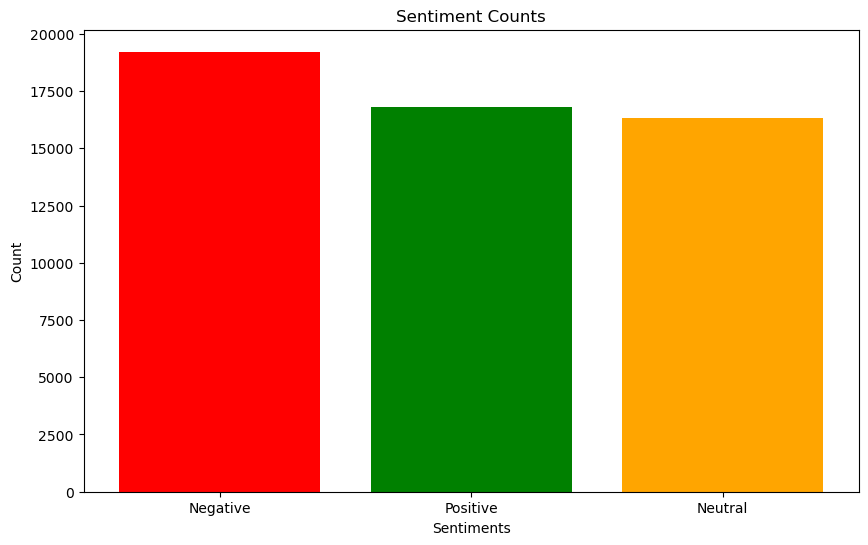

In [27]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = dataset['Sentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the bar graph
plt.show()


In [28]:
import plotly.graph_objects as go

sentiment_counts = dataset['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']


fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()


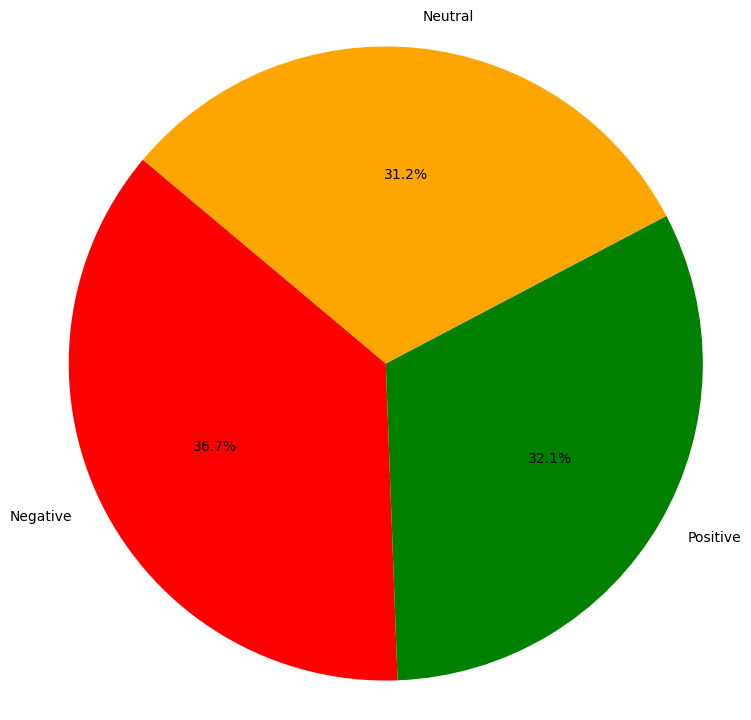

In [29]:
sentiment_counts = dataset['Sentiment'].value_counts()

# Define colors for each sentiment
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'orange'}

# Create a pie chart with custom colors
plt.figure(figsize=(9, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [30]:
print('The Count of Entities in the dataset : \n')
Entities =dataset.Entity.value_counts()
Entities.to_frame()

The Count of Entities in the dataset : 



count
Entity                                  
TomClancysRainbowSix                1983
Microsoft                           1972
TomClancysGhostRecon                1962
WorldOfCraft                        1957
Verizon                             1951
MaddenNFL                           1949
Amazon                              1942
Nvidia                              1935
johnson&johnson                     1931
Hearthstone                         1842
NBA2K                               1810
Borderlands                         1794
ApexLegends                         1792
RedDeadRedemption(RDR)              1791
LeagueOfLegends                     1753
HomeDepot                           1727
AssassinsCreed                      1625
Google                              1551
FIFA                                1543
Facebook                            1507
Dota2                               1505
PlayStation5(PS5)                   1464
CallOfDuty                          1458
Cyberpunk2077                       1445
CS-GO                               1382
CallOfDutyBlackopsColdWar           1376
Overwatch                           1346
Xbox(Xseries)                       1283
GrandTheftAuto(GTA)                 1263
Battlefield                         1199
Fortnite                            1178
PlayerUnknownsBattlegrounds(PUBG)   1150

In [31]:
print(f'The number of unique Entities : {len(dataset.Entity.unique())}')
print('**' * 40)
dataset.Entity.unique()

The number of unique Entities : 32
********************************************************************************


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

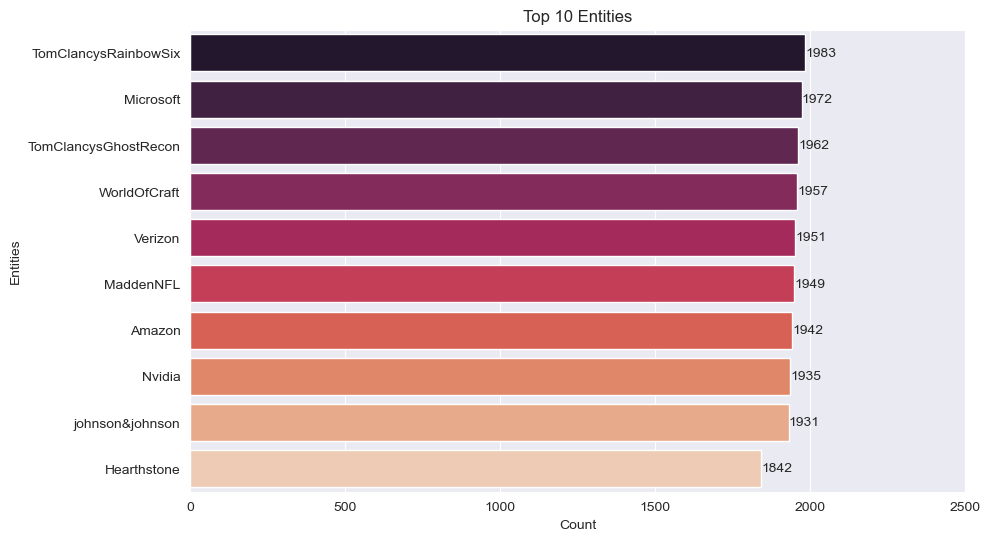

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
bar = sns.barplot(x=Entities.values[:10] ,y=Entities.index[:10] , palette='rocket')
bar.bar_label(bar.containers[0])
plt.title('Top 10 Entities')
plt.xlabel('Count')
plt.ylabel('Entities')
plt.xlim(0 , 2500)
plt.show()

In [33]:
# Create a pivot table to count the occurrences of each sentiment for each entity
pivot_table = pd.pivot_table(dataset, index='Entity', columns='Sentiment', aggfunc='size', fill_value=0)

# Add a total column to represent the total count of sentiments for each entity
pivot_table['Total'] = pivot_table.sum(axis=1)

# Add a percentage column to represent the percentage of each sentiment for each entity
for sentiment in ['Positive', 'Negative', 'Neutral']:
    pivot_table[f'{sentiment} Percentage'] = pivot_table[sentiment] / pivot_table['Total'] * 100

# Display the resulting DataFrame
pivot_table

Sentiment                          Negative  Neutral  Positive  Total  \
Entity                                                                  
Amazon                                  514     1159       269   1942   
ApexLegends                             507      778       507   1792   
AssassinsCreed                          317      131      1177   1625   
Battlefield                             395      307       497   1199   
Borderlands                             376      550       868   1794   
CS-GO                                   288      479       615   1382   
CallOfDuty                              742      353       363   1458   
CallOfDutyBlackopsColdWar               413      304       659   1376   
Cyberpunk2077                           283      426       736   1445   
Dota2                                   564      549       392   1505   
FIFA                                   1000       99       444   1543   
Facebook                                632      759       116   1507   
Fortnite                                613      133       432   1178   
Google                                  525      746       280   1551   
GrandTheftAuto(GTA)                     509      259       495   1263   
Hearthstone                             472      642       728   1842   
HomeDepot                               789      322       616   1727   
LeagueOfLegends                         563      669       521   1753   
MaddenNFL                              1490      168       291   1949   
Microsoft                               683      789       500   1972   
NBA2K                                  1274      218       318   1810   
Nvidia                                  472      808       655   1935   
Overwatch                               522      237       587   1346   
PlayStation5(PS5)                       298      447       719   1464   
PlayerUnknownsBattlegrounds(PUBG)       579      231       340   1150   
RedDeadRedemption(RDR)                  263      711       817   1791   
TomClancysGhostRecon                    795      660       507   1962   
TomClancysRainbowSix                   1035      537       411   1983   
Verizon                                 975      500       476   1951   
WorldOfCraft                            303     1011       643   1957   
Xbox(Xseries)                           292      385       606   1283   
johnson&johnson                         737      961       233   1931   

Sentiment                          Positive Percentage  Negative Percentage  \
Entity                                                                        
Amazon                                       13.851699            26.467559   
ApexLegends                                  28.292411            28.292411   
AssassinsCreed                               72.430769            19.507692   
Battlefield                                  41.451209            32.944120   
Borderlands                                  48.383501            20.958751   
CS-GO                                        44.500724            20.839363   
CallOfDuty                                   24.897119            50.891632   
CallOfDutyBlackopsColdWar                    47.892442            30.014535   
Cyberpunk2077                                50.934256            19.584775   
Dota2                                        26.046512            37.475083   
FIFA                                         28.775113            64.808814   
Facebook                                      7.697412            41.937624   
Fortnite                                     36.672326            52.037351   
Google                                       18.052869            33.849130   
GrandTheftAuto(GTA)                          39.192399            40.300871   
Hearthstone                                  39.522258            25.624321   
HomeDepot                                    35.668790            45.686161   
LeagueOfLegends 

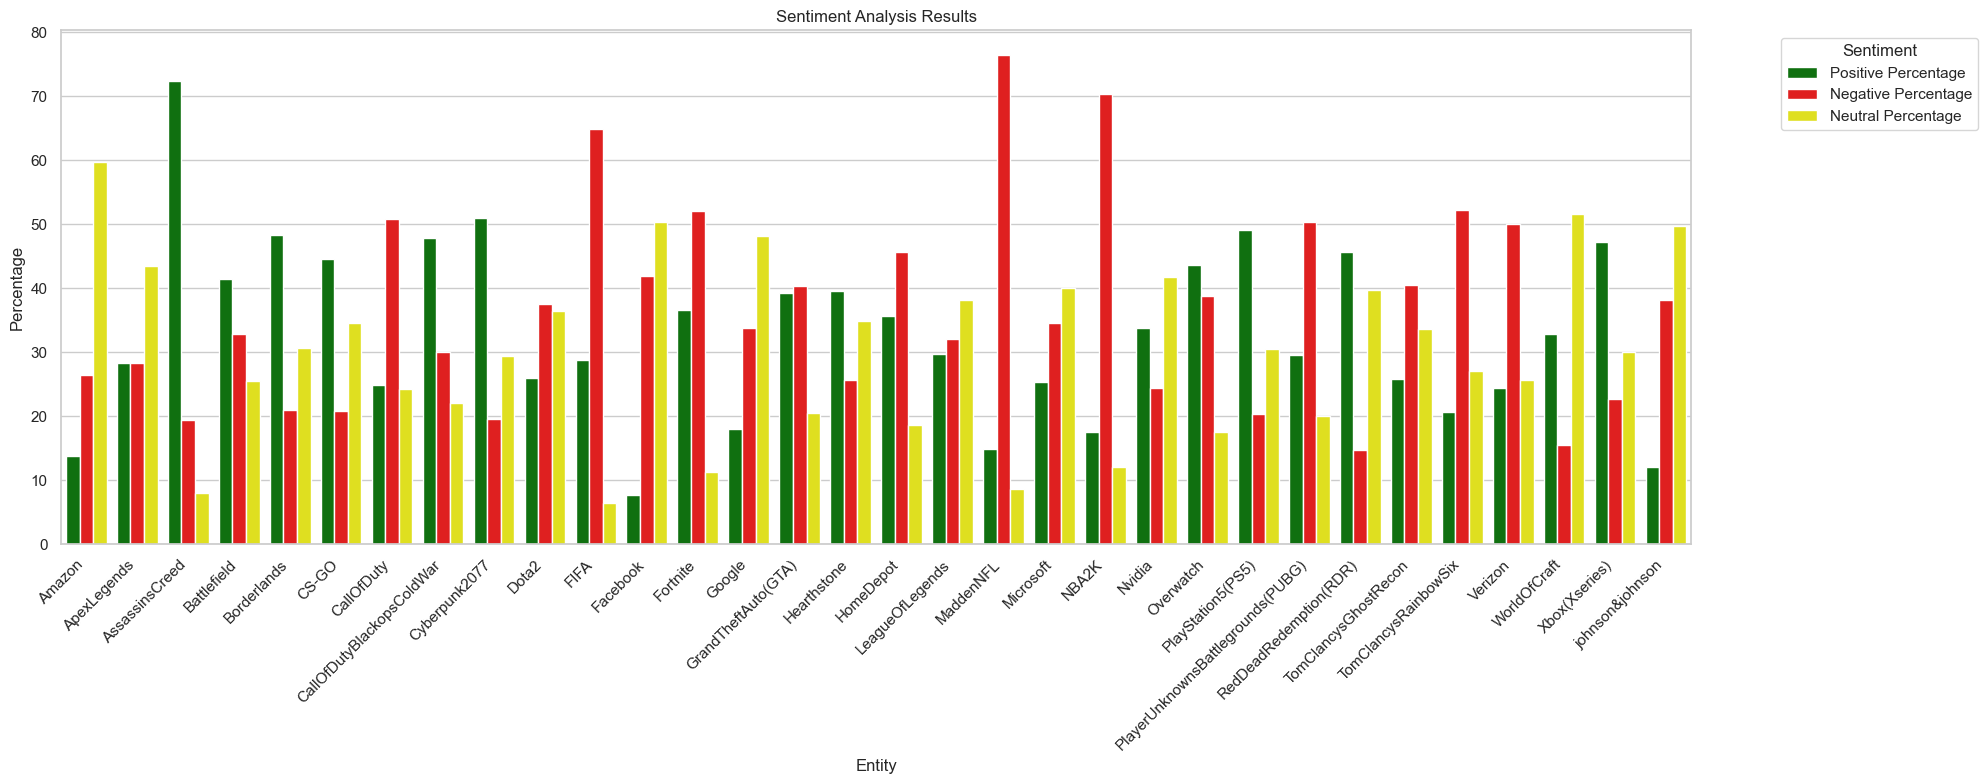

In [34]:
# Define custom color palette
custom_palette = {'Positive Percentage': 'green', 'Negative Percentage': 'red', 'Neutral Percentage': 'yellow'}

# Visualize the results using a bar plot with custom colors
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
bar_plot = sns.barplot(data=pivot_table[['Positive Percentage', 'Negative Percentage', 'Neutral Percentage']].stack().reset_index(),
                       x='Entity', y=0, hue='Sentiment', palette=custom_palette)
bar_plot.set(xlabel='Entity', ylabel='Percentage', title='Sentiment Analysis Results')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for better visibility
plt.show()

## Shape of the Training Data

In [35]:
dataset.shape

(52366, 4)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [36]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_dataset = dataset
Tokens = preprocessed_dataset['Tweet'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_dataset["Sentiment"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_dataset['Tweet'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


Training Data After Tokenization :



Tweet Sentiment Token_Length
0  [getting, borderlands, murder]  Positive   [7, 11, 6]
1         [coming, borders, kill]  Positive    [6, 7, 4]
2    [getting, borderlands, kill]  Positive   [7, 11, 4]

### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [37]:
preprocessed_dataset['Tweet length'] = preprocessed_dataset['Tweet'].astype(str).apply(len)
preprocessed_dataset['word_count'] = preprocessed_dataset['Tweet'].apply(lambda x: len(str(x).split()))
preprocessed_dataset.head(3)

Id       Entity Sentiment                       Tweet  Tweet length  \
0  2401  Borderlands  Positive  getting borderlands murder            26   
1  2401  Borderlands  Positive         coming borders kill            19   
2  2401  Borderlands  Positive    getting borderlands kill            24   

   word_count  
0           3  
1           3  
2           3

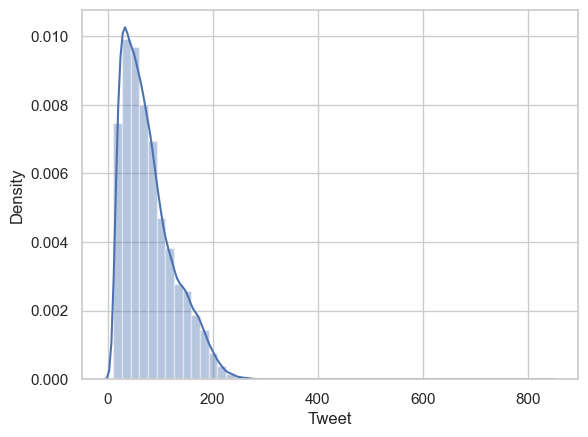

In [38]:
import seaborn as sns
text_length=preprocessed_dataset['Tweet'].str.len()
sns.distplot(text_length)
plt.show()

In [39]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

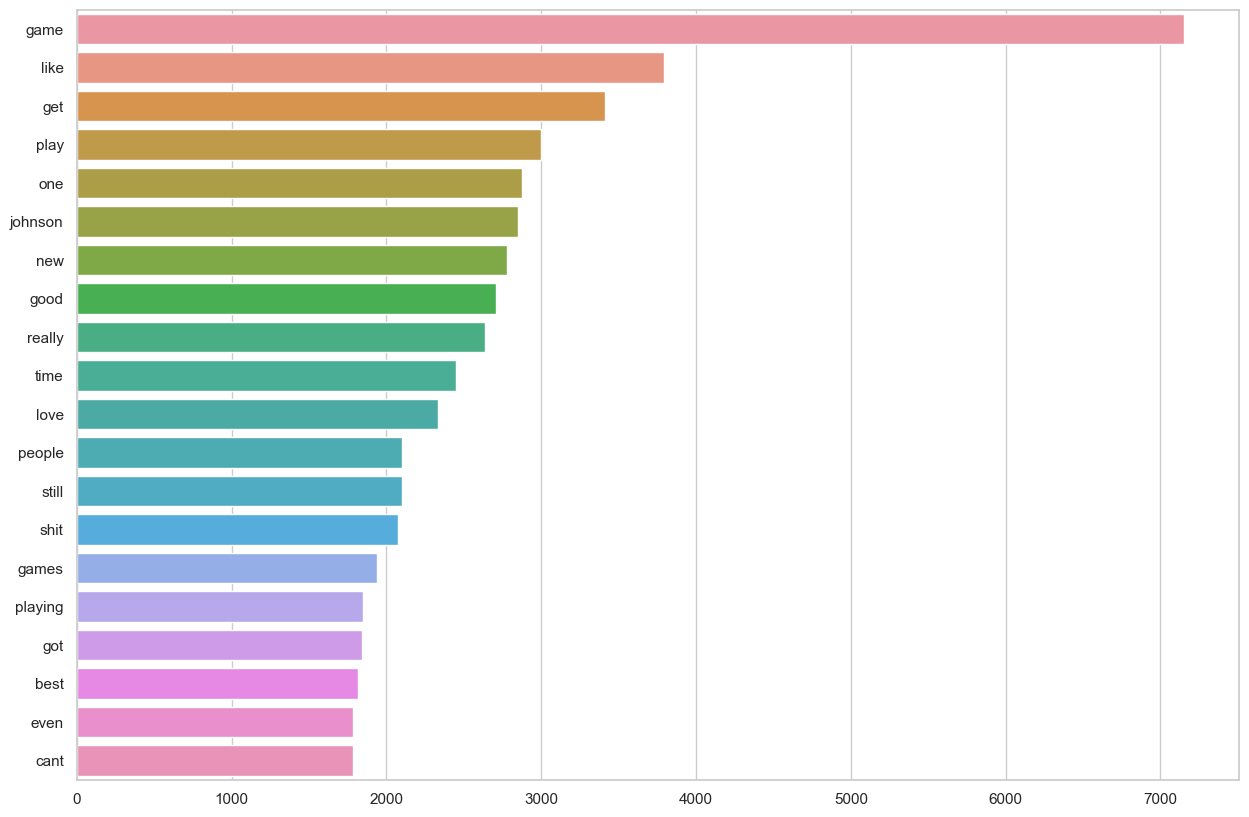

In [40]:
plot_top_non_stopwords_barchart(preprocessed_dataset['Tweet'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Positive Data

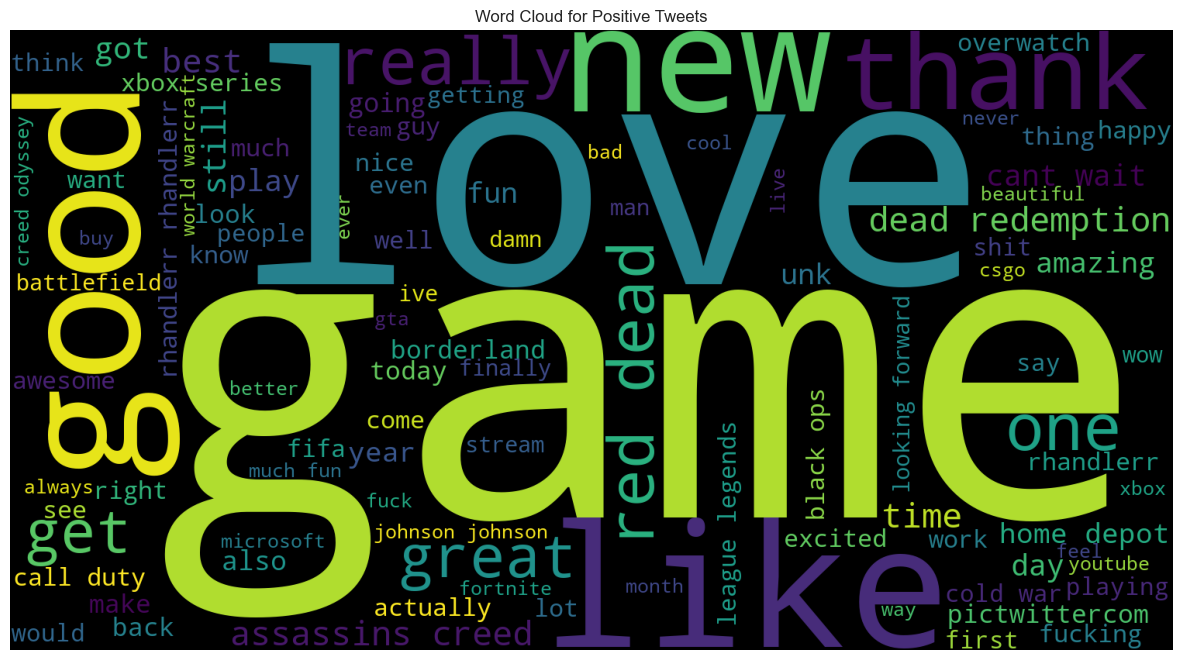

In [41]:
from wordcloud import WordCloud
stopwords_list = stopwords.words('english')
positive_reviews = dataset[dataset['Sentiment'] == 'Positive']['Tweet']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()


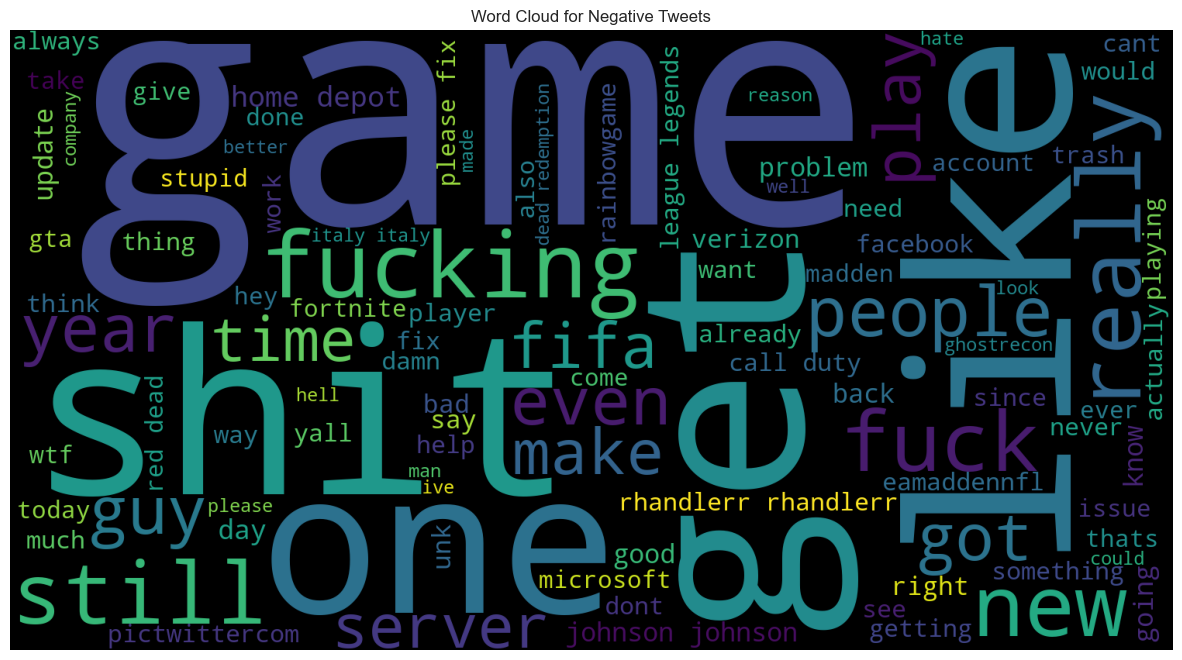

In [42]:
negative_reviews = dataset[dataset['Sentiment'] == 'Negative']['Tweet']
pos = ' '.join(map(str, negative_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()

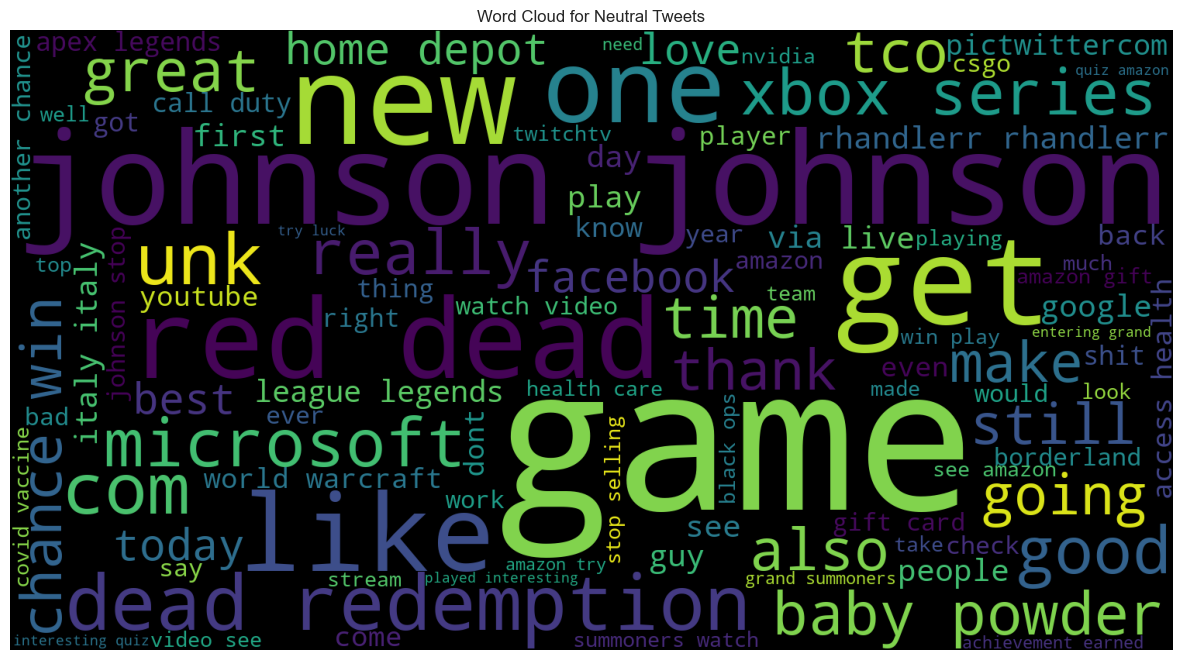

In [43]:
neutral_reviews = dataset[dataset['Sentiment'] == 'Neutral']['Tweet']
pos = ' '.join(map(str, neutral_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Tweets')
plt.axis('off')
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [44]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_dataset['Tweet'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
df1

Word  count
0      game   7152
1      like   3790
2       get   3414
3      play   2998
4       one   2879
5   johnson   2850
6       new   2776
7      good   2705
8    really   2640
9      time   2452
10     love   2330
11   people   2103
12    still   2099
13     shit   2078
14    games   1941
15  playing   1850
16      got   1843
17     best   1816
18     even   1784
19     cant   1783

Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

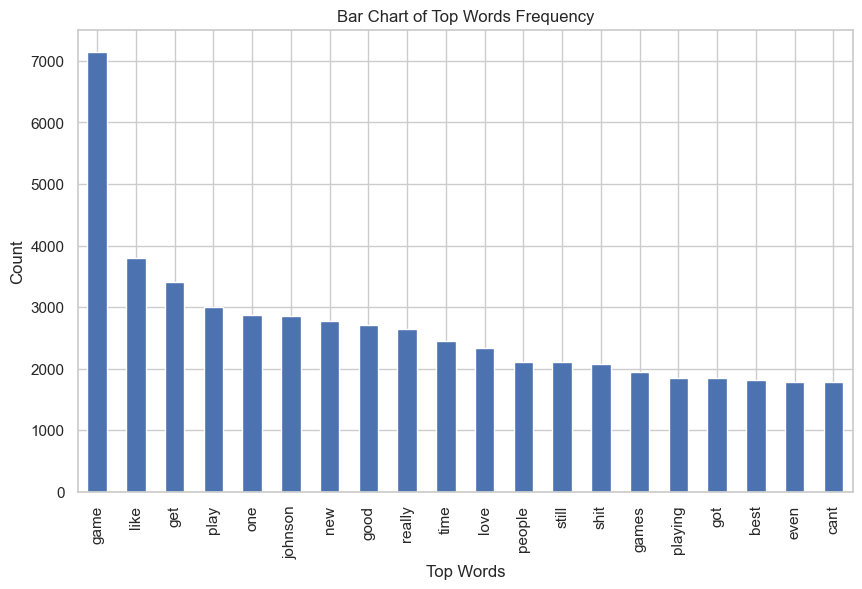

In [45]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [46]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_dataset['Tweet'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

Text  Count
0             red dead   1332
1      johnson johnson   1208
2      dead redemption   1056
3           home depot    951
4  rhandlerr rhandlerr    676
5            call duty    669
6      assassins creed    651
7       league legends    591
8          xbox series    588
9          italy italy    475

<Axes: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

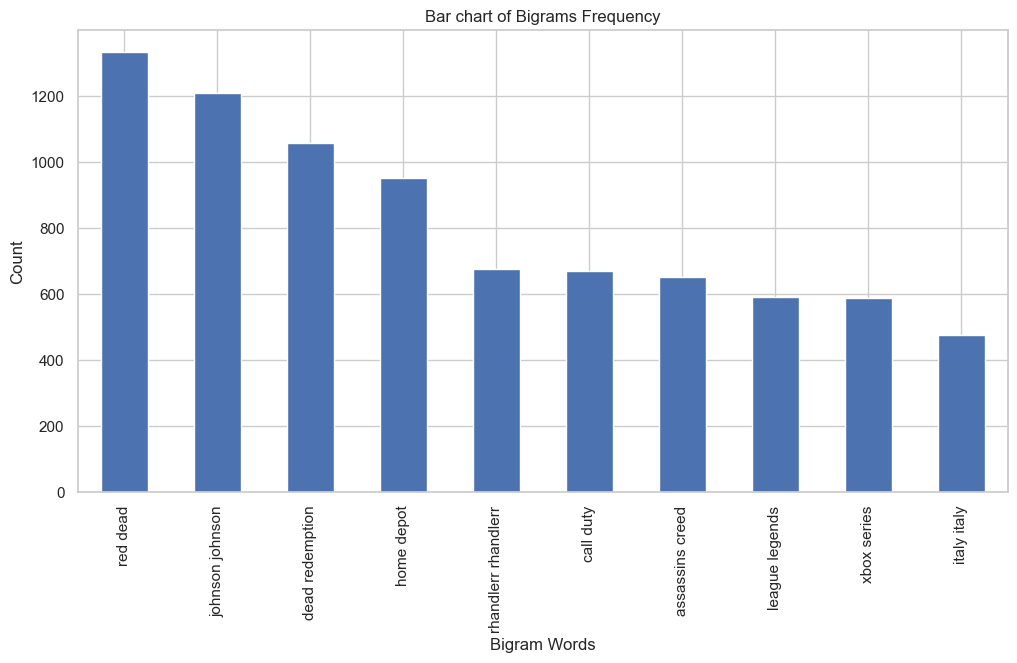

In [47]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature ExtractionMethod 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [48]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 5000 Features 
train_text = preprocessed_dataset['Tweet']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


## Convert Input of Training Data into Feature Vectors

In [49]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



aaa  abandon  abandoned  abilities  ability  able  absolute  absolutely  \
0    0        0          0          0        0     0         0           0   
1    0        0          0          0        0     0         0           0   
2    0        0          0          0        0     0         0           0   
3    0        0          0          0        0     0         0           0   
4    0        0          0          0        0     0         0           0   

   absurd  abt  ...  zelda  zero  zip  zoe  zombie  zombies  zone  \
0       0    0  ...      0     0    0    0       0        0     0   
1       0    0  ...      0     0    0    0       0        0     0   
2       0    0  ...      0     0    0    0       0        0     0   
3       0    0  ...      0     0    0    0       0        0     0   
4       0    0  ...      0     0    0    0       0        0     0   

   zonestreamcx  zoom  zuckerberg  
0             0     0           0  
1             0     0           0  
2             0     0           0  
3             0     0           0  
4             0     0           0  

[5 rows x 5000 columns]

# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [50]:
''' 
    /*------------- SPLITTING_dataset_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

dataset_output = pd.DataFrame(preprocessed_dataset["Sentiment"])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
dataset_output.head()


Output of Training Data:



Sentiment
0  Positive
1  Positive
2  Positive
3  Positive
4  Positive

In [51]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
dataset_output['Sentiment'] = label_encoder.fit_transform(dataset_output['Sentiment'])

In [52]:
dataset_output

Sentiment
0              2
1              2
2              2
3              2
4              2
...          ...
75666          0
75667          1
75670          1
75671          2
75673          1

[52366 rows x 1 columns]

In [53]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Train Machine Learning Models using Training Data

## Random Forest Classifier

In [54]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Logistic Regression Classifier

In [55]:
from sklearn.linear_model import LogisticRegression
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


## Linear SVC Classifier

In [56]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


## Naive Bayes Classifier 

In [57]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## Multinomial Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [59]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.87


Precision Score of Random Forest Classifier:

0.87


Recall Score of Random Forest Classifier:

0.87


F1 Score of Random Forest Classifier:

0.87


In [60]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3846
           1       0.87      0.84      0.85      3260
           2       0.88      0.86      0.87      3368

    accuracy                           0.87     10474
   macro avg       0.87      0.87      0.87     10474
weighted avg       0.87      0.87      0.87     10474



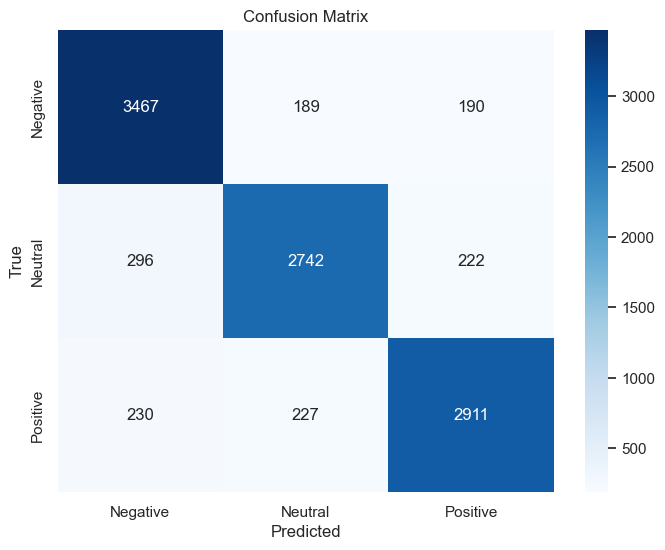

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression Classifier

In [62]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.79

precision Score of LR_claasifier:

0.79


Recall Score of LR_claasifier:

0.79


F1 Score of LR_claasifier:

0.79


In [63]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3846
           1       0.76      0.74      0.75      3260
           2       0.77      0.79      0.78      3368

    accuracy                           0.79     10474
   macro avg       0.78      0.78      0.78     10474
weighted avg       0.79      0.79      0.79     10474



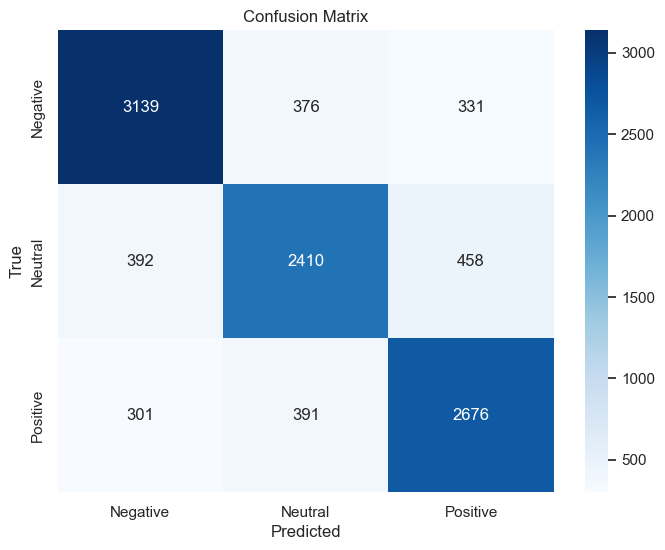

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BernoulliNB

In [65]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.72


Precision Score of BernoulliNB:

0.72


Recall Score of BernoulliNB:

0.72


F1 Score of BernoulliNB:

0.72


In [66]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      3846
           1       0.71      0.61      0.65      3260
           2       0.67      0.78      0.72      3368

    accuracy                           0.72     10474
   macro avg       0.72      0.71      0.71     10474
weighted avg       0.72      0.72      0.72     10474



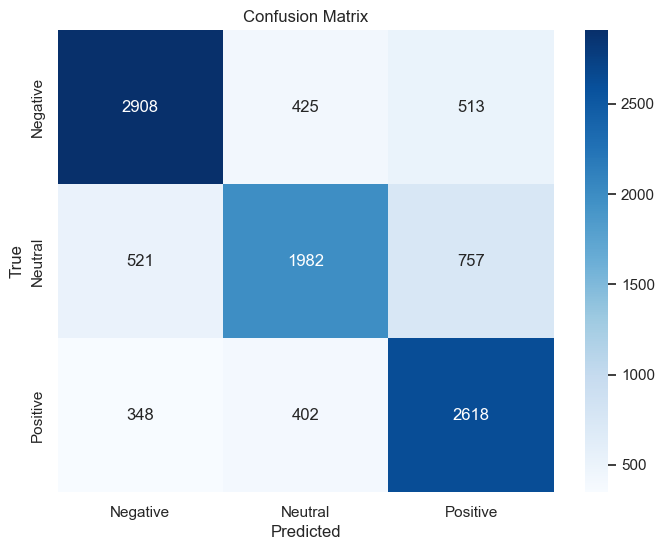

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Linear SVC

In [68]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.79

precision Score of LinearSVC:

0.79


Recall Score of LinearSVC:

0.79


F1 Score of LinearSVC:

0.79


In [69]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3846
           1       0.77      0.74      0.76      3260
           2       0.78      0.80      0.79      3368

    accuracy                           0.79     10474
   macro avg       0.79      0.79      0.79     10474
weighted avg       0.79      0.79      0.79     10474



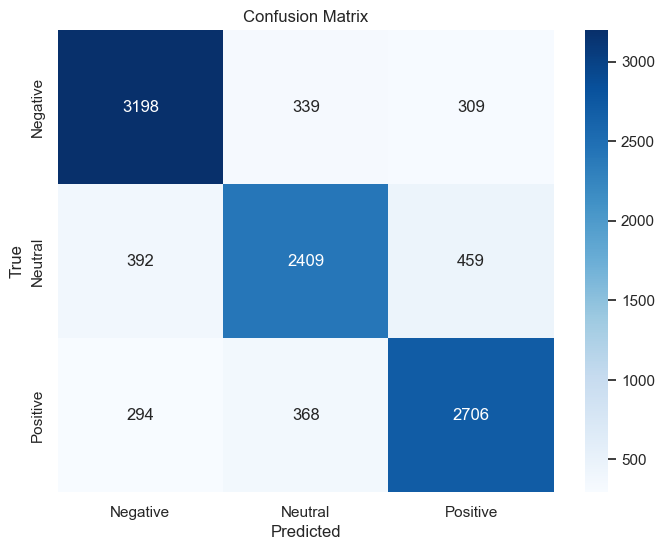

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [71]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.72

precision Score of MultinomialNB:

0.72


Recall Score of MultinomialNB:

0.72


F1 Score of MultinomialNB:

0.72


In [72]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3846
           1       0.71      0.61      0.66      3260
           2       0.69      0.77      0.73      3368

    accuracy                           0.72     10474
   macro avg       0.72      0.72      0.72     10474
weighted avg       0.72      0.72      0.72     10474



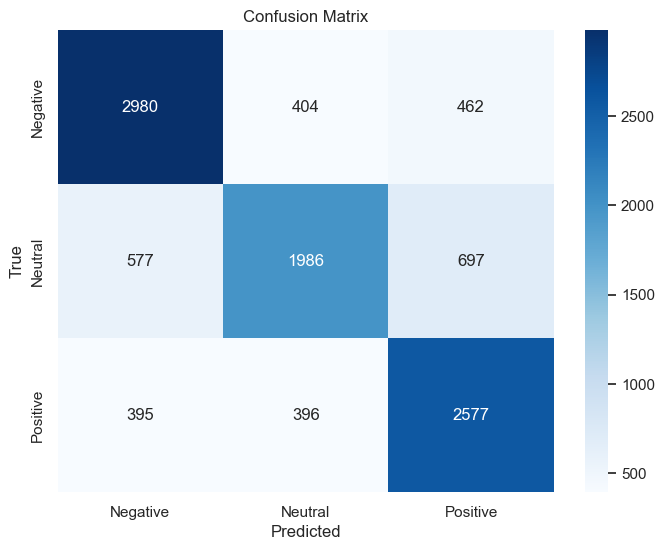

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Selection of Best Model

In [74]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.87   |    0.87   |  0.87  |   0.87   |
| Logistic Regression Classifier |   0.79   |    0.79   |  0.79  |   0.79   |
|     Bernoulli Naive Bayes      |   0.72   |    0.72   |  0.72  |   0.72   |
|           Linear SVC           |   0.79   |    0.79   |  0.79  |   0.79   |
|    Multinomial Naive Bayes     |   0.72   |    0.72   |  0.72  |   0.72   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------+----------+-----------+--------+----------+
|          Model           | Accuracy | Precision | Recall | f1_score |
+--------------------------+----------+-----------+--------+----------+
| Random Forest Classifi

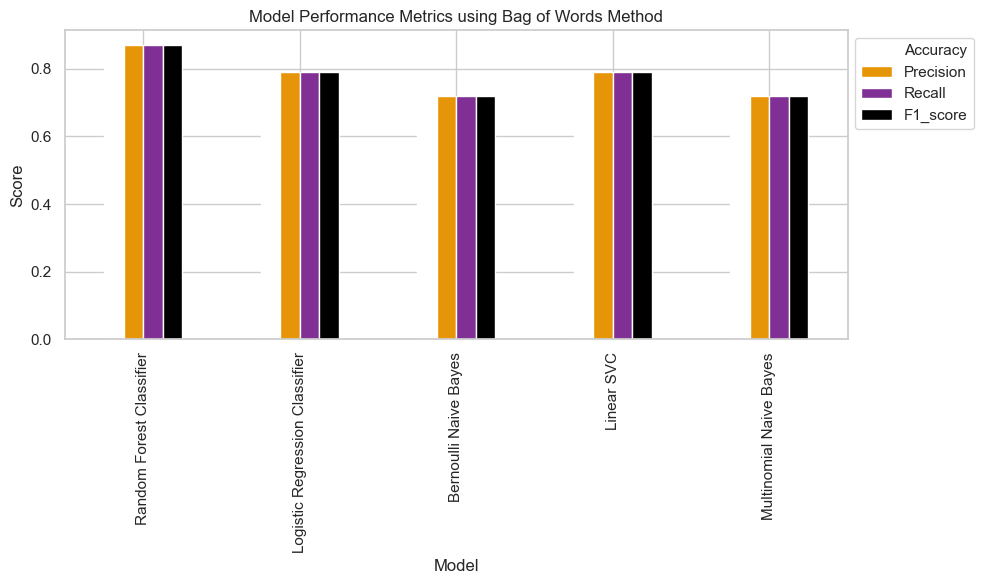

In [75]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='CMRmap_r')
plt.title('Model Performance Metrics using Bag of Words Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [76]:
filename = 'updatedTrainedModel.sav'
pickle.dump(random_forest_classifier, open(filename, 'wb'))

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature Extraction Method 2:Feature Extraction using Term Frequency-Inverse Document Frequency (TF-IDF) Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing (NLP) that evaluates the significance of words within a document relative to their occurrence across a collection of documents. TF-IDF measures are utilized to represent words in a numerical format, making them suitable for various text analysis tasks, including sentiment analysis and trend identification in financial data.


In [77]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TFIDFVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the TFIDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 3000 Features 
train_text = preprocessed_dataset['Tweet']

# Fit the Tfidf Vectorizer on Input Text of Training Data
tfidf_vectorizer = tfidf_vectorizer.fit(train_text)


In [78]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = tfidf_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = tfidf_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



aaa  abandon  abandoned  abilities  ability  able  absolute  absolutely  \
0  0.0      0.0        0.0        0.0      0.0   0.0       0.0         0.0   
1  0.0      0.0        0.0        0.0      0.0   0.0       0.0         0.0   
2  0.0      0.0        0.0        0.0      0.0   0.0       0.0         0.0   
3  0.0      0.0        0.0        0.0      0.0   0.0       0.0         0.0   
4  0.0      0.0        0.0        0.0      0.0   0.0       0.0         0.0   

   absurd  abt  ...  zelda  zero  zip  zoe  zombie  zombies  zone  \
0     0.0  0.0  ...    0.0   0.0  0.0  0.0     0.0      0.0   0.0   
1     0.0  0.0  ...    0.0   0.0  0.0  0.0     0.0      0.0   0.0   
2     0.0  0.0  ...    0.0   0.0  0.0  0.0     0.0      0.0   0.0   
3     0.0  0.0  ...    0.0   0.0  0.0  0.0     0.0      0.0   0.0   
4     0.0  0.0  ...    0.0   0.0  0.0  0.0     0.0      0.0   0.0   

   zonestreamcx  zoom  zuckerberg  
0           0.0   0.0         0.0  
1           0.0   0.0         0.0  
2           0.0   0.0         0.0  
3           0.0   0.0         0.0  
4           0.0   0.0         0.0  

[5 rows x 5000 columns]

In [79]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Random Forest

In [80]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


In [81]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)



Accuracy Score of Random Forest Classifier:

0.86


Precision Score of Random Forest Classifier:

0.86


Recall Score of Random Forest Classifier:

0.86


F1 Score of Random Forest Classifier:

0.86


In [82]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3846
           1       0.85      0.84      0.84      3260
           2       0.89      0.84      0.86      3368

    accuracy                           0.86     10474
   macro avg       0.86      0.86      0.86     10474
weighted avg       0.86      0.86      0.86     10474



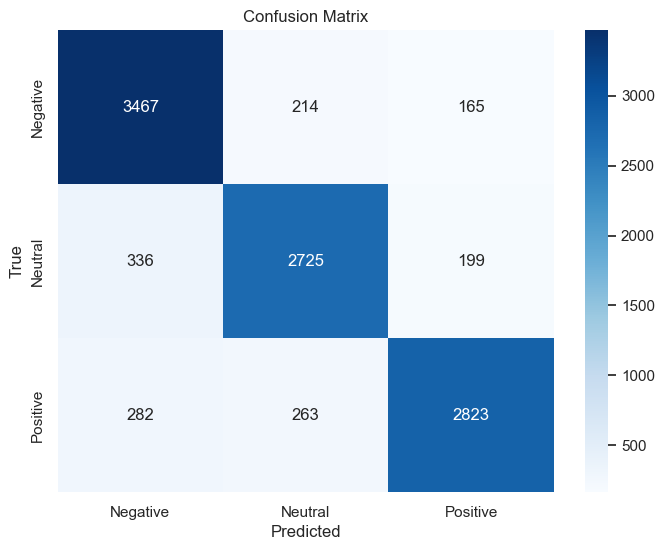

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Logistic Regression Classifier

In [84]:
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


In [85]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.77

precision Score of LR_claasifier:

0.77


Recall Score of LR_claasifier:

0.77


F1 Score of LR_claasifier:

0.77


In [86]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3846
           1       0.74      0.71      0.73      3260
           2       0.76      0.77      0.76      3368

    accuracy                           0.77     10474
   macro avg       0.77      0.77      0.77     10474
weighted avg       0.77      0.77      0.77     10474



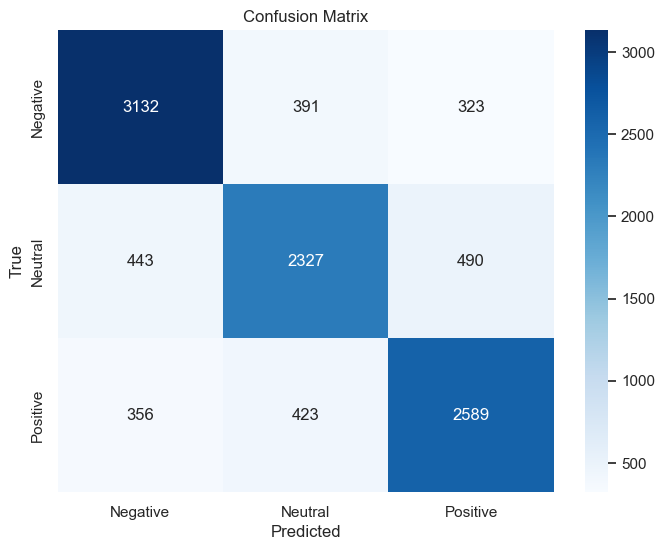

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Linear SVC

In [88]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


In [89]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.79

precision Score of LinearSVC:

0.79


Recall Score of LinearSVC:

0.79


F1 Score of LinearSVC:

0.79


In [90]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3846
           1       0.77      0.73      0.75      3260
           2       0.78      0.80      0.79      3368

    accuracy                           0.79     10474
   macro avg       0.79      0.79      0.79     10474
weighted avg       0.79      0.79      0.79     10474



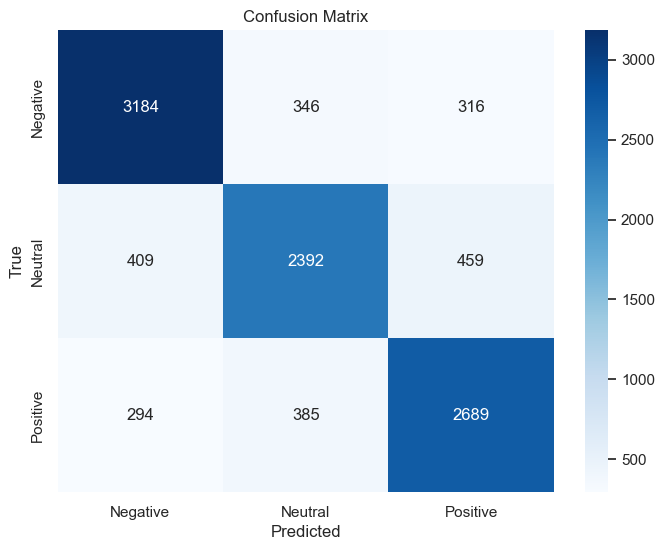

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# BernoulliNB

In [92]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


In [93]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.72


Precision Score of BernoulliNB:

0.72


Recall Score of BernoulliNB:

0.72


F1 Score of BernoulliNB:

0.72


In [94]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      3846
           1       0.71      0.61      0.65      3260
           2       0.67      0.78      0.72      3368

    accuracy                           0.72     10474
   macro avg       0.72      0.71      0.71     10474
weighted avg       0.72      0.72      0.72     10474



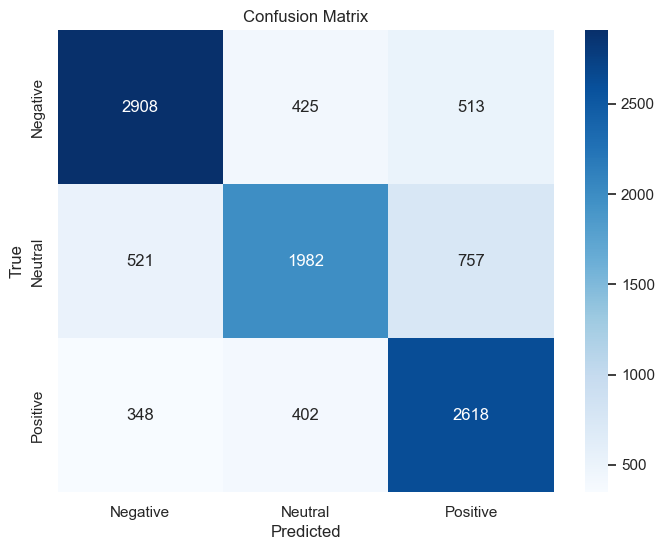

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [96]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


In [97]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='macro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.73

precision Score of MultinomialNB:

0.73


Recall Score of MultinomialNB:

0.73


F1 Score of MultinomialNB:

0.73


In [98]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      3846
           1       0.75      0.60      0.67      3260
           2       0.71      0.76      0.73      3368

    accuracy                           0.73     10474
   macro avg       0.73      0.72      0.72     10474
weighted avg       0.73      0.73      0.73     10474



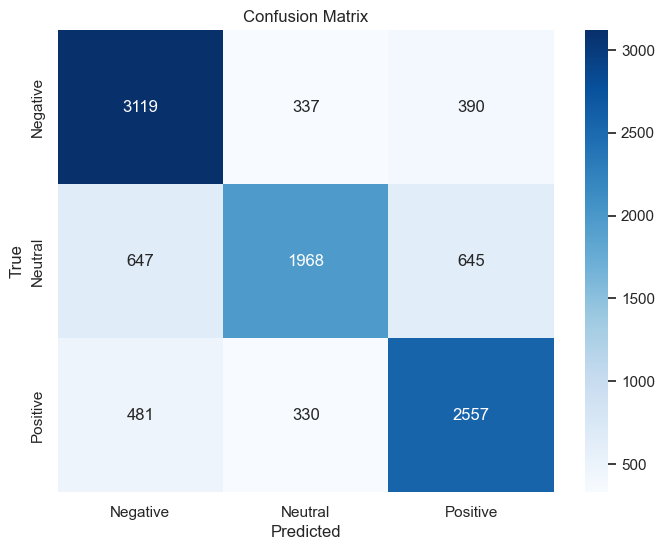

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Best Results

In [100]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.86   |    0.86   |  0.86  |   0.86   |
| Logistic Regression Classifier |   0.77   |    0.77   |  0.77  |   0.77   |
|     Bernoulli Naive Bayes      |   0.72   |    0.72   |  0.72  |   0.72   |
|           Linear SVC           |   0.79   |    0.79   |  0.79  |   0.79   |
|    Multinomial Naive Bayes     |   0.73   |    0.73   |  0.73  |   0.73   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------+----------+-----------+--------+----------+
|          Model           | Accuracy | Precision | Recall | f1_score |
+--------------------------+----------+-----------+--------+----------+
| Random Forest Classifi

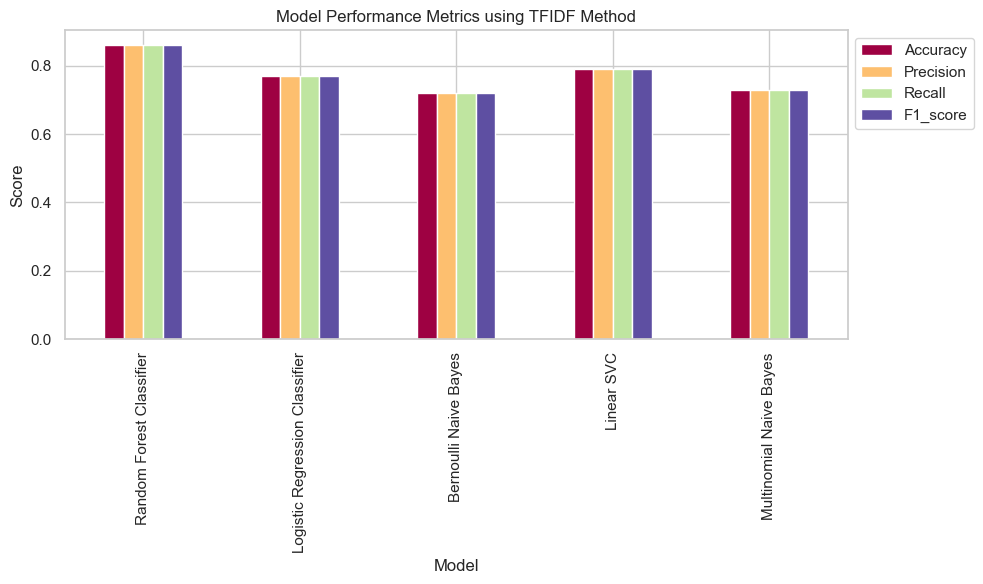

In [101]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using TFIDF Method')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Application Phase</b></div>

In [102]:
def process_text(text):
    #store user input into numpy array
    usertext = np.empty([0,0])
    usertext = np.append(usertext, text)
    #Load saved vectorizer
    #vectorizer = pickle.load(open('trainedtfidf.pkl', 'rb'))
    fitVectorizer = count_vectorizer.transform(usertext)
    fitVectorizer = fitVectorizer.todense()
    #print(vectorizer.get_feature_names())
    countVectDF = pd.DataFrame(fitVectorizer, columns=count_vectorizer.get_feature_names_out())
    #print("\n",countVectDF)
    return countVectDF

In [103]:
def load_Model(text):
    loadedLG = pickle.load(open(filename, 'rb'))
    outputPrediction = loadedLG.predict(process_text(text))
    return outputPrediction


In [104]:
def make_Prediction(text):
    if text == 0:
        emotion ="Negative"
    elif text == 1:
        emotion ="Neutral"
    elif text == 2:
        emotion ="Positive"
    return emotion

In [105]:
from tkinter import *


with open('updatedTrainedModel.sav', 'rb') as f:
    loadedLG = pickle.load(f)

In [106]:
def detect():
    user_input = input1.get("1.0","end-1c")
    answer.config(text=make_Prediction(load_Model(user_input)))

In [107]:
root = Tk()
root.title('Sentiment Analysis System')
root.geometry('530x430')
root.resizable(width=True, height=True)

topFrame = Frame(root)
topFrame.pack()
bottomFrame = Frame(root)
bottomFrame.pack(side=BOTTOM)

label11 = Label(root, text='Sentiment Analysis System ',font=("Times 24 bold"),fg='Dark Blue').place(x = 80,y = 10)


label1 = Label(root, text='Enter the Tweet',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 57)
#label1.pack()

input1 = Text(root, height=6, width=40)
input1.place(x = 105,y = 90)
#input1.pack()

button1 = Button(root, text='Detect', command=detect, height=2,width=15,fg='green', bd=6,font=("Times 11 bold")).place(x = 190,y = 206)
#button1.pack()

label1 = Label(root, text='Sentiment: ',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 270)
#label1.pack()

answer = Label(root, text='' ,font=("Times 18 bold"),fg='Black')
answer.place(x = 230,y = 300)
#answer.pack()

button2 = Button(root, text='Cancel', command=quit, height=2, width=15, fg='red', bd=6,font=("Times 11 bold")).place(x = 190,y = 345)
#button2.pack()
label11 = Label(root, text='Developed by: Developer',font=("Times 8"),fg='black').place(x = 95,y = 405)
root.mainloop()